In [ ]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

load the dataset

In [ ]:
dataset = pd.read_csv('/content/emails-1.csv')
dataset.shape

(5726, 2)

In [ ]:
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


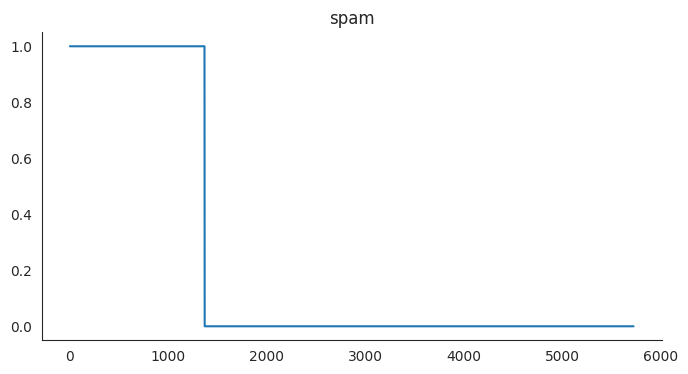

In [ ]:
# @title spam

from matplotlib import pyplot as plt
dataset['spam'].plot(kind='line', figsize=(8, 4), title='spam')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726 entries, 0 to 5725
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5726 non-null   object
 1   spam    5726 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
dataset.describe()

,spam
count,5726.000000
mean,0.238910
std,0.426455
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**DATA** **VISUALIZATION**

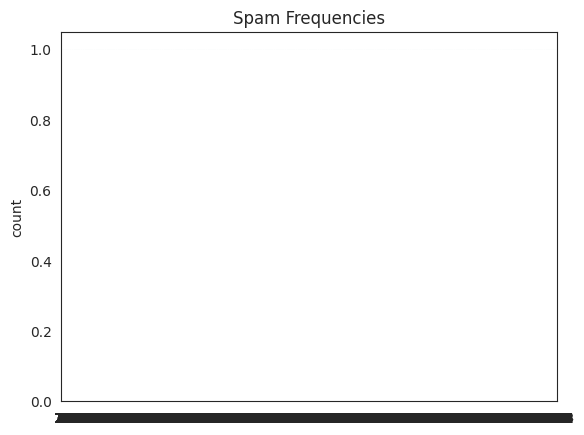

In [ ]:
plt.figure(dpi=100)
sns.countplot(dataset['spam'])
plt.title("Spam Frequencies")
plt.show()

DATA CLEANING

In [ ]:
dataset.isnull().sum()

text    0
spam    0
dtype: int64

In [ ]:
#check the duplicates and remove them
dataset.drop_duplicates(inplace=True)

In [ ]:
#cleaning data from punctuation and stopwords and then tokenizing it into words(tokens)
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [ ]:
# fit the CountVectorizer to data
message = CountVectorizer(analyzer=process).fit_transform(dataset['text'])

In [ ]:
#save the vectorizer
import os
# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

#save the vectorizer
dump(message,open("models/Vectorizer.pk1","wb"))

**data splitting**

In [ ]:
#split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(message,dataset['spam'],test_size = 0.20,random_state = 0)

**Model**

we will create and train a multinomial bayes model

In [ ]:
#model creation
model = MultinomialNB()

In [ ]:
#model training
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
#model saving
dump(model,open("models/model.pk1","wb"))

In [ ]:
#model predictioins on test set
y_pred = model.predict(x_test)

In [ ]:
#model evaluation/accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

99.20983318700614

In [ ]:
#model evaluation/classification report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       869\n           1       0.97      0.99      0.98       270\n\n    accuracy                           0.99      1139\n   macro avg       0.99      0.99      0.99      1139\nweighted avg       0.99      0.99      0.99      1139\n'

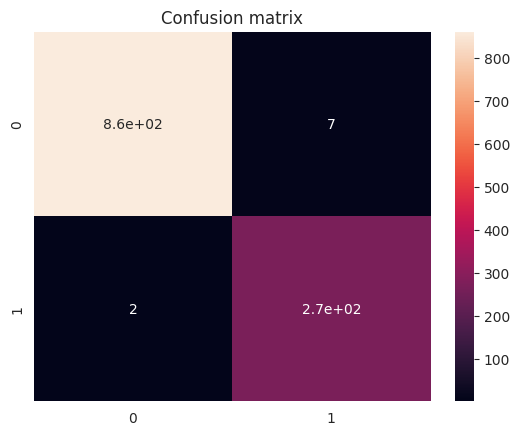

In [ ]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()